In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506241445.pkl', 'rb'))
df

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,month_of_year_12,hour_of_day_9,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,is_open,is_close
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,False,True,False,False,False,False,False,False,1,0
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,False,True,False,False,False,False,False,False,0,0
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,False,False,True,False,False,False,False,False,0,0
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,False,False,True,False,False,False,False,False,0,0
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,False,False,True,False,False,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,False,False,False,False,False,False,True,False,0,0
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,False,False,False,False,False,False,False,True,0,0
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,False,False,False,False,False,False,False,True,0,0
2025-05-30 15:30:00,-0.13,-0.11,-0.31,-0.24,-0.11,-0.14,-0.49,-0.09,-0.15,-0.19,...,False,False,False,False,False,False,False,True,0,0


In [39]:
# Data preprocessing
y_cols = ['AAL_Change_Volume','ALGT_Change_Volume','ALK_Change_Volume','DAL_Change_Volume','JBLU_Change_Volume','LUV_Change_Volume','UAL_Change_Volume']
#x_cols = ['AAL_Change_Volume','ALGT_Change_Volume','ALK_Change_Volume','DAL_Change_Volume','ITA_Change_Volume','IYT_Change_Volume','JBLU_Change_Volume','JETS_Change_Volume','LUV_Change_Volume','UAL_Change_Volume',
#        'AAL_Change_Volume_Day','ALGT_Change_Volume_Day','ALK_Change_Volume_Day','DAL_Change_Volume_Day','ITA_Change_Volume_Day','IYT_Change_Volume_Day','JBLU_Change_Volume_Day','JETS_Change_Volume_Day','LUV_Change_Volume_Day','UAL_Change_Volume_Day',
#        'day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4',
#        'month_of_year_1','month_of_year_2','month_of_year_3','month_of_year_4','month_of_year_5','month_of_year_6','month_of_year_7','month_of_year_8','month_of_year_9','month_of_year_10','month_of_year_11','month_of_year_12',
#        'hour_of_day_9','hour_of_day_10','hour_of_day_11','hour_of_day_12','hour_of_day_13','hour_of_day_14','hour_of_day_15',
#        'is_open','is_close'
#        ]

y = df[y_cols]
#x = df[x_cols]
x=df

In [40]:
# We have to lag the features by 1 time period
x = x[1:]
y = y[:-1]

In [41]:
# Train/test splitting
split_val  = round(0.7 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [42]:
# Normalize the features to [0,1]
sc2 = MinMaxScaler(feature_range=(0, 1))

x_train = sc2.fit_transform(x_train)
x_val   = sc2.transform(x_val)
x_test  = sc2.transform(x_test)

In [43]:
x_train.shape

(33795, 2709)

In [44]:
y_train.shape

(33795, 7)

In [45]:
ols = LinearRegression()

ols.fit(x_train, y_train)
ols.score(x_val, y_val)

0.45965137264097705

In [46]:
lasso = Lasso(
    alpha=1 
)

lasso.fit(x_train, y_train)
lasso.score(x_val, y_val)

0.5695312886508317

In [49]:
# Save the model
pickle.dump(ols  , open('../../output/models/ols_volume_model.pkl', 'wb'))
pickle.dump(lasso, open('../../output/models/lasso_volume_model.pkl', 'wb'))

In [57]:
pd.DataFrame(ols.coef_.T)

,0,1,2,3,4,5,6
0,1.072761e+07,44897.137448,74497.749090,6.555624e+05,1.135343e+06,-1.283794e+05,9.878565e+05
1,-4.135040e+04,2703.474540,-27365.783243,-5.234059e+05,-6.433622e+05,-1.120096e+06,-1.019978e+06
2,-1.060553e+07,2064.979000,233330.922298,-4.195560e+06,-2.951506e+06,1.126329e+06,-4.034382e+06
3,-1.758569e+06,38941.550910,-38395.460910,-3.712159e+06,-6.565629e+05,-7.281484e+04,3.363998e+05
4,1.106625e+07,19583.310873,-76941.301874,5.260067e+06,4.867242e+06,6.401067e+05,4.649931e+06
...,...,...,...,...,...,...,...
2704,-2.005103e+07,-135282.250813,-546732.673427,-9.820007e+06,-3.766035e+06,-6.489587e+06,-8.575742e+06
2705,-2.007730e+07,-135730.063193,-547673.920672,-9.829917e+06,-3.775699e+06,-6.500197e+06,-8.583420e+06
2706,-2.010441e+07,-136215.364844,-550241.429524,-9.836037e+06,-3.777627e+06,-6.503501e+06,-8.593517e+06
2707,7.859006e+05,21796.463331,147452.163095,3.430777e+05,6.031932e+05,4.386258e+05,3.677135e+05


In [47]:
y_pred_ols = ols.predict(x_val)
y_pred_lasso = lasso.predict(x_val)

In [31]:
y_pred_ols[:,0]

array([ 49950.10011086,  36636.34434489, -24118.01582308, ...,
        84815.11188836, -81046.83008767, -82695.02176404])

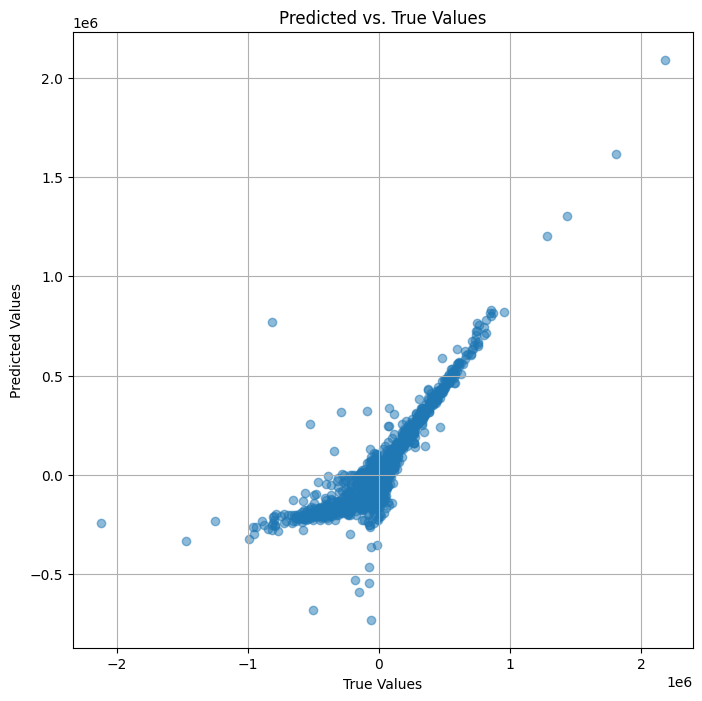

In [48]:
plt.figure(figsize=(8, 8))
plt.scatter(y_val.iloc[:,2], y_pred_lasso[:,2], alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.grid(True)
plt.show()